# Trees -  Binary Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (9,6)

# Frame

In [2]:
df = pd.read_csv("data/historical_loan.csv")

In [3]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


Features (X)
- amount: Loan Amount
- years: No. of years of employment
- ownership: type of house live
- income: earning
- age: how old they are
- grade: credit scoer (A is good, G is bad)

Target (y)
- default

We want to predict how will default?

# Refine

In [4]:
# missing value
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [5]:
df.years = df.years.fillna(np.mean(df.years))

In [6]:
df.isnull().sum()

default      0
amount       0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

# Transform


Choose these two variables
- Grade
- Amount



In [7]:
X = df[['grade', 'amount']].copy()
y = df[['default']]

In [8]:
# preprocessing - Label Encoding
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder().fit(df.grade)

In [10]:
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [11]:
X.grade = le.transform(df.grade)

In [12]:
X.head()

,grade,amount
0,1,1000
1,0,6500
2,0,2400
3,2,10000
4,2,4000


# Explore

Plot - two variables and default as color

In [13]:
x1 = X.iloc[:,0]
x2 = X.iloc[:,1]

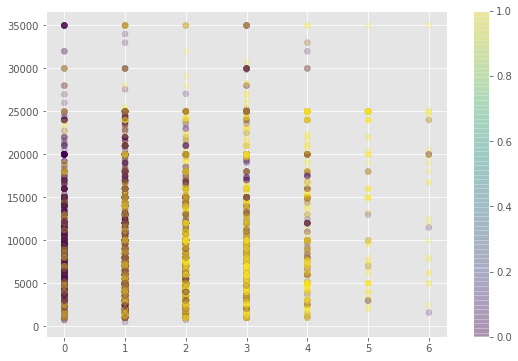

In [14]:
plt.scatter(x1, x2, c= y, alpha=0.2, cmap = 'viridis')
plt.colorbar()

In [15]:
from plotnine import *

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


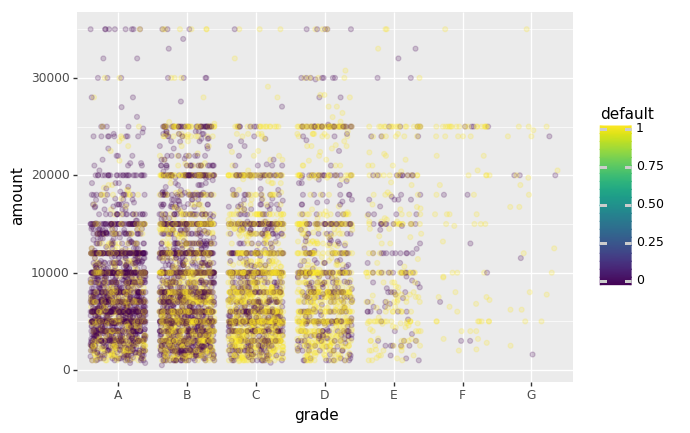

<ggplot: (288194673)>

In [16]:
ggplot(df) + aes('grade', 'amount', color ='default') + geom_jitter(alpha = 0.2)

# Model

Make a decision tree with depth 4
- Show the graph
- Show the decison space

In [17]:
from sklearn import tree

In [18]:
clf = tree.DecisionTreeClassifier(max_depth=4).fit(X,y)

In [19]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
import pydotplus 
from IPython.display import Image

In [21]:
dot_data = tree.export_graphviz(clf, out_file='tree2.dot', feature_names=X.columns,
                                class_names=['no', 'yes'], filled=True, 
                                rounded=True, special_characters=True)

In [22]:
graph = pydotplus.graph_from_dot_file('tree2.dot')  

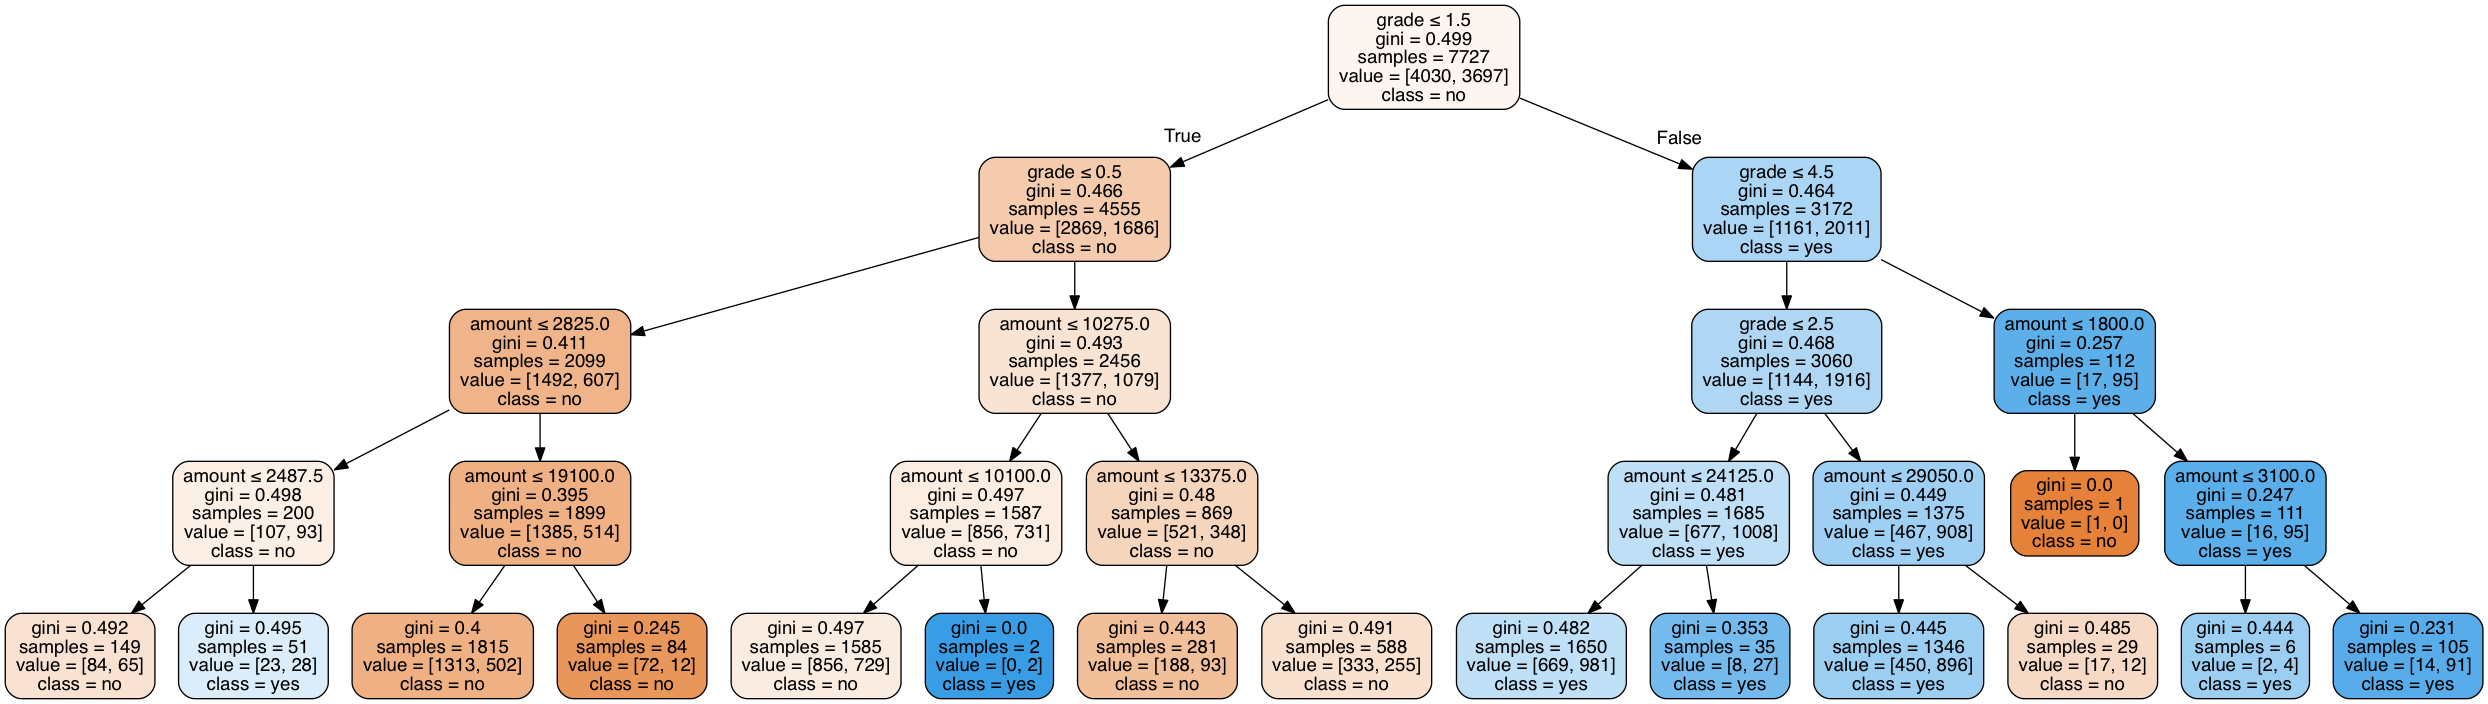

In [23]:
Image(graph.create_png()) 

In [24]:
def plot_classifier_2d(clf, data, target):
    x_min, x_max = data.iloc[:,0].min(), data.iloc[:,0].max()
    y_min, y_max = data.iloc[:,1].min(), data.iloc[:,1].max()
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, (x_max - x_min)/100), 
        np.arange(y_min, y_max, (y_max - y_min)/100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap="viridis", alpha = 0.3)
    plt.colorbar(cs)
    #plt.scatter(x = data.iloc[:,0], y = data.iloc[:,1], c = target, s = 20, cmap="magma")


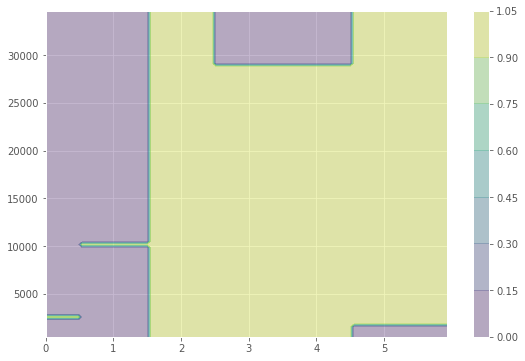

In [25]:
plot_classifier_2d(clf, X, y)

In [26]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Hyper Parameters

- max_depth = 3, 6, 10
- min_sampl_split = 2,5, 10

In [27]:
import ipywidgets as widgets
from ipywidgets import interact, interactive

In [28]:
def depth(n):
    clf=tree.DecisionTreeClassifier(max_depth=n).fit(X,y)
    plot_classifier_2d(clf,X,y)

In [29]:
depthSlider = widgets.IntSlider(min=1, max=10, step=1, value=1)

In [30]:
#interactive(depth, n = depthSlider)

In [31]:
clf.predict(X)

array([0, 0, 0, ..., 0, 0, 1])

In [32]:
clf.predict_proba(X)[:,1]

array([ 0.45993691,  0.27658402,  0.43624161, ...,  0.45993691,
        0.45993691,  0.59454545])

In [33]:
def plot_classifier_2d_prob(clf, data, target):
    x_min, x_max = data.iloc[:,0].min(), data.iloc[:,0].max()
    y_min, y_max = data.iloc[:,1].min(), data.iloc[:,1].max()
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, (x_max - x_min)/100), 
        np.arange(y_min, y_max, (y_max - y_min)/100))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap="viridis", alpha = 0.3)
    plt.colorbar(cs)
    #plt.scatter(x = data.iloc[:,0], y = data.iloc[:,1], c = target, s = 20, cmap="magma")


In [34]:
def depth_prob(n):
    clf=tree.DecisionTreeClassifier(max_depth=n).fit(X,y)
    plot_classifier_2d_prob(clf,X,y)

In [35]:
#interactive(depth_prob, n = depthSlider)

In [36]:
#interactive(depth, n = depthSlider)

# Model for All data

In [37]:
X = df.iloc[:,1:].copy()
y = df.iloc[:,0]

In [38]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [39]:
le_grade = LabelEncoder().fit(X.grade)
le_ownership = LabelEncoder().fit(X.ownership)

In [40]:
X.grade = le_grade.transform(X.grade)
X.ownership = le_ownership.transform(X.ownership)

In [41]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,1,2.0,3,19200.0,24
1,6500,0,2.0,0,66000.0,28
2,2400,0,2.0,3,60000.0,36
3,10000,2,3.0,3,62000.0,24
4,4000,2,2.0,3,20000.0,28


In [42]:
def get_prediction(clf, X, y):
    y_pred = clf.predict(X)
    y_proba = clf.predict_proba(X)[:,1]
    prediction = pd.DataFrame({"actual": np.array(y), "predicted": y_pred, "probability": y_proba })
    prediction.actual = prediction.actual.astype("category")
    prediction.predicted = prediction.predicted.astype("category")
    return prediction

In [43]:
def depth_prediction(n):
    clf=tree.DecisionTreeClassifier(max_depth=n).fit(X,y)
    prediction = get_prediction(clf, X, y)
    return prediction

In [61]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
prediction = depth_prediction(16)

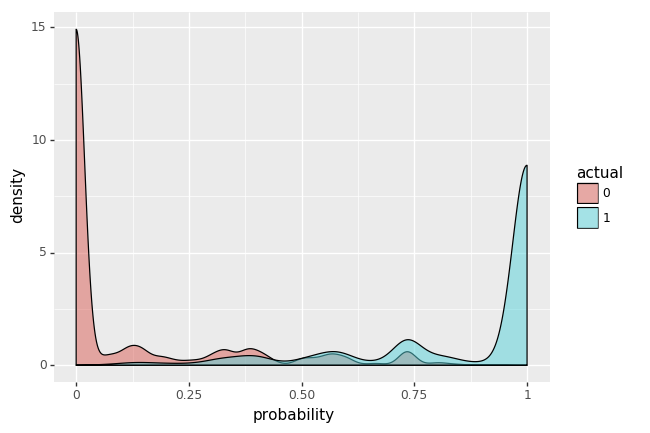

<ggplot: (-9223372036559213161)>

In [69]:
ggplot(prediction) + aes('probability', fill='actual') + geom_density(alpha = 0.5)

In [74]:
from sklearn import metrics

In [75]:
def model_evaluation(data, target, model, model_name):
    model_fit = model.fit(data, target)
    pred = model_fit.predict(data)
    proba = model_fit.predict_proba(data)
    
    fpr, tpr, thresholds = metrics.roc_curve(target, proba[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    
    print("Model: %s" % model_name)

    # Scores for the model
    print("accuracy: %.3f" % metrics.accuracy_score(target, pred))
    print("recall: %.3f" % metrics.precision_score(target, pred))
    print("precision: %.3f" % metrics.recall_score(target, pred))
    print("confusion_matrix:")
    print(metrics.confusion_matrix(target, pred))
    print("auc: %.3f" % metrics.auc(fpr, tpr))
    
    # ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return roc_auc

In [81]:
clf = tree.DecisionTreeClassifier(max_depth=15)

Model: DT_depth_15
accuracy: 0.891
recall: 0.889
precision: 0.882
confusion_matrix:
[[3622  408]
 [ 437 3260]]
auc: 0.968


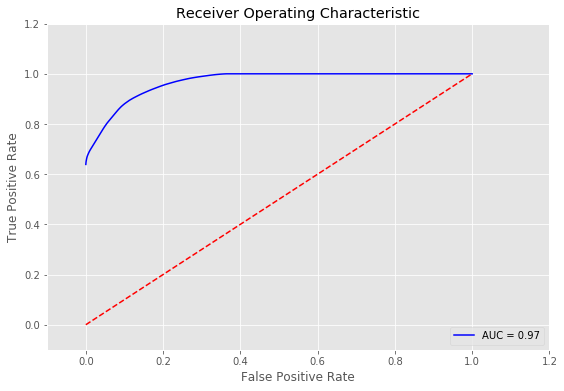

0.96781848470794163

In [82]:
model_evaluation(X,y,clf, "DT_depth_15")

In [83]:
from sklearn.model_selection import StratifiedKFold
from scipy import interp

In [84]:
def model_evaluation_crossval(data, target, model, model_name): 
    data = np.array(data)
    target = np.array(target)
    cv = StratifiedKFold(n_splits=5)

    # Create the color options  
    cmap = plt.get_cmap('viridis')
    indices = np.linspace(0, cmap.N, 5)
    colors = [cmap(int(i)) for i in indices]
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    
    # intiate plot
    plt.figure(figsize=(8, 8))
    
    i = 0
    for (train, test) in cv.split(data, target):
        print(train, test)
        probas_ = model.fit(data[train], target[train]).predict_proba(data[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = metrics.roc_curve(target[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, color=colors[i],
                 label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i = i + 1
    
    # ROC Curve
    mean_tpr /= cv.get_n_splits(data, target)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random')

    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


[1410 1412 1414 ..., 7724 7725 7726] [   0    1    2 ..., 1737 1738 1741]
[   0    1    2 ..., 7724 7725 7726] [1410 1412 1414 ..., 3522 3527 3528]
[   0    1    2 ..., 7724 7725 7726] [2801 2802 2803 ..., 5132 5134 5135]
[   0    1    2 ..., 7724 7725 7726] [4168 4171 4172 ..., 6416 6417 6418]
[   0    1    2 ..., 6416 6417 6418] [5883 5884 5885 ..., 7724 7725 7726]


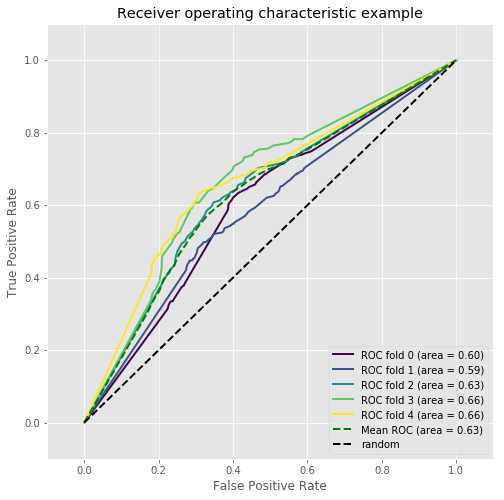

In [85]:
model_evaluation_crossval(X,y,clf, "DT_depth_15")

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
clf_rf = RandomForestClassifier(n_estimators=50, max_depth=10)

[1410 1412 1414 ..., 7724 7725 7726] [   0    1    2 ..., 1737 1738 1741]
[   0    1    2 ..., 7724 7725 7726] [1410 1412 1414 ..., 3522 3527 3528]
[   0    1    2 ..., 7724 7725 7726] [2801 2802 2803 ..., 5132 5134 5135]
[   0    1    2 ..., 7724 7725 7726] [4168 4171 4172 ..., 6416 6417 6418]
[   0    1    2 ..., 6416 6417 6418] [5883 5884 5885 ..., 7724 7725 7726]


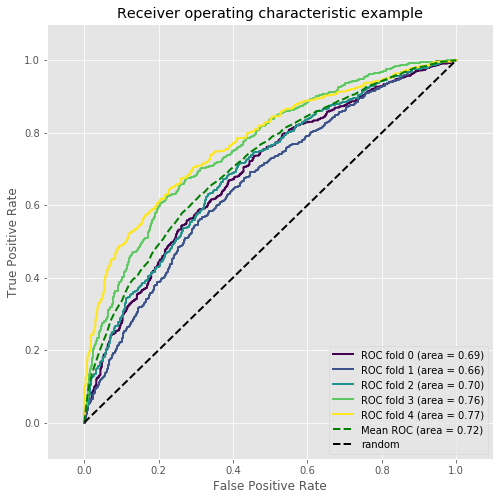

In [94]:
model_evaluation_crossval(X,y,clf_rf, "Random Forest")